In [117]:
%matplotlib inline 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2


import pickle
df = pd.read_pickle("/home/maksim/Documents/Art_dataset")

In [118]:
df

,sale_date,Price,Author,Art,Owner,Sign,Technique,Material,Nazi,Framed,...,year,deal_time_(utc),normalized_price,hasFollowers,hasAfter,isUntitled,isNumbered,normalized_estimatefrom,normalized_estimateto,Paths
0,10.02.2011,4857250,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,-,1,oil,canvas,0,0,...,2011,19:00,5471265.38,0,0,0.0,0.0,3647510.25,5471265.38,/home/maksim/Art_Images_cropped/alberto\ giaco...
1,09.05.2016,3250000,alberto giacometti,ATELIER I,-,1,oil,canvas,0,0,...,2016,23:00,3728226.00,0,0,0.0,0.0,2663018.57,3728226.00,/home/maksim/Art_Images_cropped/alberto\ giaco...
2,03.05.2013,13750,alberto giacometti,BUST II,-,1,lithograph,paper,0,1,...,2013,14:00,7682.11,0,0,0.0,1.0,5487.22,7682.11,/home/maksim/Art_Images_cropped/alberto\ giaco...
3,29.04.2011,11250,alberto giacometti,BUST OF MAN,-,1,lithograph,paper,0,1,...,2011,14:00,13638.75,0,0,0.0,1.0,9092.50,13638.75,/home/maksim/Art_Images_cropped/alberto\ giaco...
4,07.11.2012,734500,alberto giacometti,BUSTE,-,1,oil,canvas,0,0,...,2012,15:00,1670279.99,0,0,0.0,0.0,1113519.99,1670279.99,/home/maksim/Art_Images_cropped/alberto\ giaco...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12522,05.10.2015,1000000,zhang xiaogang,WASTE LAND NO. 3,-,1,oil,paper,0,1,...,2015,6:30,97424.96,0,0,0.0,1.0,69589.26,97424.96,/home/maksim/Art_Images_cropped/zhang\ xiaogan...
12523,05.10.2015,1125000,zhang xiaogang,WASTE LAND NO. 4,-,1,oil,paper,0,1,...,2015,6:30,97424.96,0,0,0.0,1.0,69589.26,97424.96,/home/maksim/Art_Images_cropped/zhang\ xiaogan...
12524,03.04.2011,9844000,zhang xiaogang,YELLOW BABY,-,1,oil,canvas,0,0,...,2011,10:30,1023031.45,0,0,0.0,0.0,730736.74,1023031.45,/home/maksim/Art_Images_cropped/zhang\ xiaogan...
12525,06.10.2019,2125000,zhang xiaogang,YELLOW BABY NO. 2 (FROM THE BLOODLINE SERIES),-,1,oil,canvas,0,0,...,2019,10:30,101979.43,0,0,0.0,1.0,76484.57,101979.43,/home/maksim/Art_Images_cropped/zhang\ xiaogan...


In [119]:
df.columns

Index(['sale_date', 'Price', 'Author', 'Art', 'Owner', 'Sign', 'Technique',
       'Material', 'Nazi', 'Framed', 'Size', 'square_m', 'Currency',
       'EstimateFrom', 'EstimateTo', 'ExhibitedNum', 'ProvenanceNum',
       'LiteratureNum', 'CataloguingLength', 'Time', 'City', 'Description',
       'tried_url', 'Image', 'date_of_birth', 'date_of_death', 'century',
       'nationality', 'sex', 'style', 'repeat_sale', 'feature1', 'feature2',
       'number_of_day', 'day_of_week', 'month', 'year', 'deal_time_(utc)',
       'normalized_price', 'hasFollowers', 'hasAfter', 'isUntitled',
       'isNumbered', 'normalized_estimatefrom', 'normalized_estimateto',
       'Paths'],
      dtype='object')

In [120]:
df = df[df.isNumbered == 0]
df.reset_index(drop=True, inplace=True)

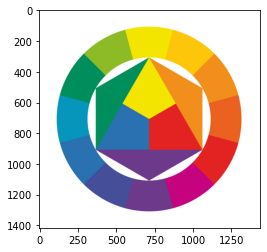

In [121]:
path = "/home/maksim/Documents/itten.jpg"
image = cv2.imread(path)[:,:,::-1]
plt.imshow(image)
plt.show()

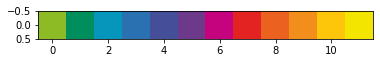

In [122]:
itten_colors = [
    image[300][510], image[400][300], image[700][250], image[1000][250], image[1200][500], image[1200][750],
image[1100][1000], image[1000][1100], image[750][1200], image[500][1200], image[300][900], image[300][700]
]

# itten_colors_luv = [cv2.cvtColor(np.array([[x]]), cv2.COLOR_RGB2Luv)[0][0] for x in itten_colors]

itten_colors_luv = cv2.cvtColor(np.array([itten_colors], 'float32') / 255, cv2.COLOR_RGB2Luv).reshape(-1,3)


plt.imshow([itten_colors])
plt.show()

In [123]:
np.shape(itten_colors)

(12, 3)

In [124]:
def get_image(i):
    return cv2.imread(df.Paths[i])
def get_pixel(i, j, num):
    return np.array([[get_image(num)[i][j]]])
def plot_image(i):
    plt.imshow(get_image(i)[:,:,::-1])
    plt.show()

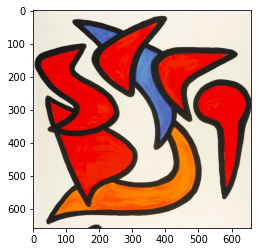

In [125]:
plot_image(101)

In [126]:
from sklearn.metrics.pairwise import euclidean_distances


def get_image_colors(image_index):
    luv_img = cv2.cvtColor(np.array(get_image(image_index), 'float32')/255, cv2.COLOR_BGR2LUV)
    closest_colors = np.argmin(euclidean_distances(luv_img.reshape(-1,3), itten_colors_luv),axis=1)   
    v, c = np.unique(closest_colors, return_counts=True)
    c = c / c.sum()
    return v, c, closest_colors, np.shape(luv_img)

def plot_itten(image_index):
    im_data = get_image_colors(image_index)
    im = im_data[2]
    im_shape = (im_data[3][0],im_data[3][1])
    f = lambda x: np.array(itten_colors)[x]
    itten_im = f(im.reshape(im_shape))
    cur_im = get_image(image_index)[:,:,::-1]
    fig, axarr = plt.subplots(1,2)
    axarr[0].set_axis_off()
    axarr[1].set_axis_off()
    axarr[0].imshow(itten_im)
    axarr[1].imshow(cur_im)
    axarr[0].text(0, -100, 'Itten')
    axarr[1].text(0, -100, df['Art'][image_index])
    plt.show()
    

def plot_freq(image_index):
    image = get_image(image_index)    
    colors_info = get_image_colors(image_index)
    colors_indexes, colors_freq = colors_info[0], colors_info[1]
    
    colors = np.array([])
    for j, i in enumerate(colors_indexes):
        itten_pixel = np.array([[itten_colors[int(i)]]], 'float32')
        width = int(10*colors_freq[int(j)]) + 1
        height = 1
        resized = cv2.resize(itten_pixel, (width, height), interpolation = cv2.INTER_AREA)
        if colors_freq[int(j)] > 0.05:
            colors = np.append(colors, resized)
        
    colors = np.reshape(colors, (len(colors) // 3,-1))
    plt.imshow(np.array([colors]).astype(np.uint8))
    plt.show()
    

def get_freq(index):
    l = get_image_colors(index)
    return np.array([l[0], l[1]])

size = np.shape(df)[0]
colors_freq = [get_freq(x) for x in range(size)]

KeyboardInterrupt: 

In [56]:
colors_freq

[array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 5.00000000e+00,
         6.00000000e+00, 9.00000000e+00, 1.00000000e+01],
        [1.71346893e-02, 8.88785165e-01, 1.15108278e-04, 7.81446064e-02,
         4.40194293e-04, 9.08849423e-03, 6.29174256e-03]]),
 array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 5.00000000e+00,
         6.00000000e+00, 9.00000000e+00, 1.00000000e+01],
        [1.37121545e-04, 9.29549060e-01, 2.95338711e-05, 4.81275526e-02,
         4.07145509e-04, 1.66929659e-02, 5.05662065e-03]]),
 array([[0.00000000e+00, 1.00000000e+00, 5.00000000e+00],
        [6.46084268e-05, 9.88808898e-01, 1.11264941e-02]]),
 array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 4.00000000e+00,
         5.00000000e+00, 9.00000000e+00, 1.00000000e+01],
        [4.92340495e-04, 8.27368355e-01, 1.68795328e-01, 2.62581597e-06,
         1.77767741e-03, 1.31290799e-06, 1.56236050e-03]]),
 array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 5.00000000e+00],
        [2.21631

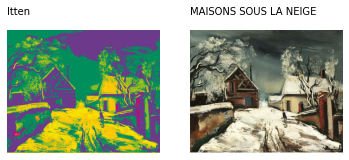

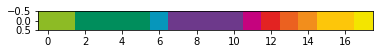

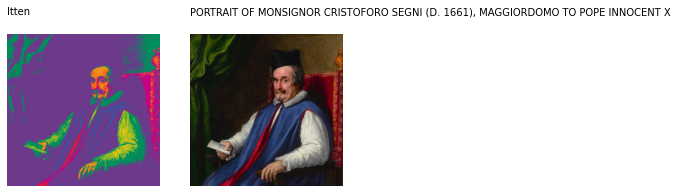

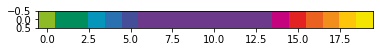

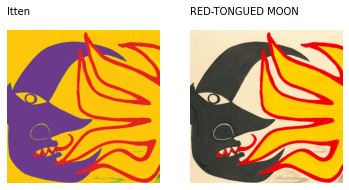

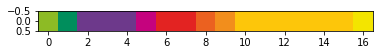

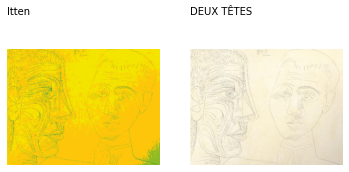

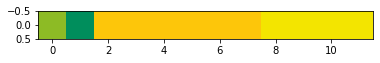

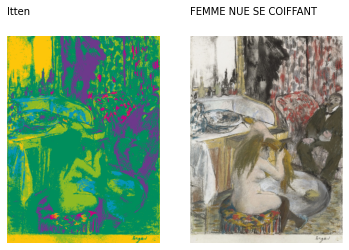

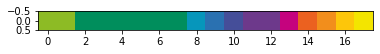

In [490]:
for i in np.random.choice(8000, 5):
    plot_itten(i)
    plot_freq(i)

In [728]:
# colors_freq = [get_image_colors(x) for x in np.arange(df.shape[0])]

In [57]:
l = []
for pair in colors_freq:
    colors_indexes = pair[0]
    freq = pair[1]
    for i in range(12):
        if i not in colors_indexes:
            freq = np.insert(freq, i, 0)
    l.append(freq)
df_colors = pd.DataFrame(l, columns=["салатовый","зеленый", "бирюзовый","синий","темно-синий","фиолетовый","розовый","красный","ярко-оранжевый","оранжевый","ярко-желтый","желтый"])
data = pd.concat([df, df_colors], axis=1)

In [58]:
data

,sale_date,Price,Author,Art,Owner,Sign,Technique,Material,Nazi,Framed,...,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,ярко-оранжевый,оранжевый,ярко-желтый,желтый
0,10.02.2011,4857250,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,-,1,oil,canvas,0,0,...,0.000115,0.000000,0.000000,0.078145,0.000440,0.000000,0.000000,0.009088,0.006292,0.000000
1,09.05.2016,3250000,alberto giacometti,ATELIER I,-,1,oil,canvas,0,0,...,0.000030,0.000000,0.000000,0.048128,0.000407,0.000000,0.000000,0.016693,0.005057,0.000000
2,07.11.2012,734500,alberto giacometti,BUSTE,-,1,oil,canvas,0,0,...,0.000000,0.000000,0.000000,0.011126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,05.02.2008,5620500,alberto giacometti,BUSTE,-,1,oil,canvas,0,0,...,0.168795,0.000000,0.000003,0.001778,0.000000,0.000000,0.000000,0.000001,0.001562,0.000000
4,09.02.2005,50400,alberto giacometti,BUSTE D'HOMME OR TÊTE D'HOMME - RECTO TÊTE D'H...,-,1,ink,paper,0,0,...,0.003320,0.000000,0.000000,0.003409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,15.10.2007,328500,zhang xiaogang,UNTITLED (BLOODLINE SERIES),-,1,oil,canvas,0,0,...,0.044616,0.000000,0.000000,0.005210,0.000001,0.000000,0.000000,0.000286,0.000043,0.000000
9256,16.05.2007,132000,zhang xiaogang,UNTITLED (PORTRAIT),-,1,oil,paper,0,0,...,0.398131,0.000000,0.000021,0.002436,0.000017,0.000000,0.000000,0.002538,0.007063,0.212294
9257,04.04.2016,1087500,zhang xiaogang,WAITING SPIRITS,-,1,oil,paper,0,1,...,0.044894,0.001264,0.005859,0.015461,0.020856,0.004731,0.038209,0.033444,0.426119,0.002279
9258,03.04.2011,9844000,zhang xiaogang,YELLOW BABY,-,1,oil,canvas,0,0,...,0.569470,0.000000,0.000000,0.094935,0.000000,0.000000,0.000000,0.002554,0.100726,0.162693


In [59]:
import pickle
data.to_pickle("/home/maksim/Documents/data_Art_with_freq_2_with_freq")

In [133]:
import pickle
import pandas as pd
import numpy as np
data = pd.read_pickle("/home/maksim/Documents/data_Art_with_freq_2_with_freq")

In [141]:
data

,sale_date,Price,Author,Art,Owner,Sign,Technique,Material,Nazi,Framed,...,синий,темно-синий,фиолетовый,розовый,красный,ярко-оранжевый,оранжевый,ярко-желтый,желтый,lines_variance
0,10.02.2011,4857250,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,-,1,oil,canvas,0,0,...,0.000000,0.000000,0.078145,0.000440,0.000000,0.000000,0.009088,0.006292,0.000000,0.066145
1,09.05.2016,3250000,alberto giacometti,ATELIER I,-,1,oil,canvas,0,0,...,0.000000,0.000000,0.048128,0.000407,0.000000,0.000000,0.016693,0.005057,0.000000,0.080503
2,07.11.2012,734500,alberto giacometti,BUSTE,-,1,oil,canvas,0,0,...,0.000000,0.000000,0.011126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039318
3,05.02.2008,5620500,alberto giacometti,BUSTE,-,1,oil,canvas,0,0,...,0.000000,0.000003,0.001778,0.000000,0.000000,0.000000,0.000001,0.001562,0.000000,0.050133
4,09.02.2005,50400,alberto giacometti,BUSTE D'HOMME OR TÊTE D'HOMME - RECTO TÊTE D'H...,-,1,ink,paper,0,0,...,0.000000,0.000000,0.003409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,15.10.2007,328500,zhang xiaogang,UNTITLED (BLOODLINE SERIES),-,1,oil,canvas,0,0,...,0.000000,0.000000,0.005210,0.000001,0.000000,0.000000,0.000286,0.000043,0.000000,0.008081
9256,16.05.2007,132000,zhang xiaogang,UNTITLED (PORTRAIT),-,1,oil,paper,0,0,...,0.000000,0.000021,0.002436,0.000017,0.000000,0.000000,0.002538,0.007063,0.212294,0.014918
9257,04.04.2016,1087500,zhang xiaogang,WAITING SPIRITS,-,1,oil,paper,0,1,...,0.001264,0.005859,0.015461,0.020856,0.004731,0.038209,0.033444,0.426119,0.002279,0.094087
9258,03.04.2011,9844000,zhang xiaogang,YELLOW BABY,-,1,oil,canvas,0,0,...,0.000000,0.000000,0.094935,0.000000,0.000000,0.000000,0.002554,0.100726,0.162693,0.012035


In [150]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_lines_var(i):
    edges = cv2.Canny(cv2.imread(data.Paths[i]),100,200)
    return np.var(edges.reshape(1,-1)[0]/255)


def plot_edge_image(i):
    img = cv2.imread(data.Paths[i])
    edges = cv2.Canny(img,100,200)
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    print(np.round(np.var(edges.reshape(1,-1)[0]/255),3))

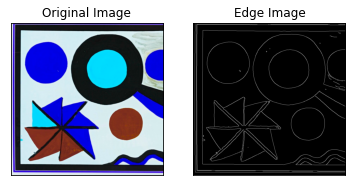

0.03


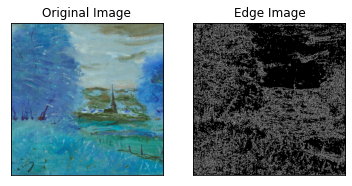

0.146


In [151]:
plot_edge_image(31)
plot_edge_image(462)

In [137]:
var = np.array([get_lines_var(i) for i in np.arange(data.shape[0])])
data = data.join(pd.DataFrame(var, columns=["lines_variance"]))

In [138]:
X = data[[
    'Author', 'Art',
    'салатовый','зеленый',  'бирюзовый', 'синий', 'темно-синий',
       'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый', 'оранжевый',
       'ярко-желтый','желтый', 'lines_variance',
          'Technique',
          'Material',
          'style',
          'Nazi',
          'Sign',
          'Framed', 
          'square_m', 
          'ExhibitedNum', 
          'ProvenanceNum',
          'LiteratureNum', 
    
          'sex',
          'date_of_birth',
          'hasFollowers', 
          'hasAfter', 
          'isUntitled',
          'Paths',
    
        
          'normalized_price'  
         ]][data["normalized_price"] > 10].copy()
X.reset_index(drop=True, inplace=True)

In [66]:
# colors = X[['салатовый','зеленый',  'бирюзовый', 'синий', 'темно-синий',
#        'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый', 'оранжевый',
#        'ярко-желтый', 
#        'желтый']]

# comp_colors = np.array([colors.values[i].argsort()[-2:][::-1] for i in range(colors.shape[0])])
# X = pd.concat([X, pd.DataFrame([int(abs(x[0]-x[1]) % 6 <= 1) for x in comp_colors], columns=["Complementary"])], axis=1)

In [139]:
X['normalized_price'] = np.log(X['normalized_price'])

In [143]:
X

,Author,Art,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,...,ExhibitedNum,ProvenanceNum,LiteratureNum,sex,date_of_birth,hasFollowers,hasAfter,isUntitled,Paths,normalized_price
0,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,0.017135,0.888785,0.000115,0.000000,0.000000,0.078145,0.000440,0.000000,...,2,3,3,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,15.515020
1,alberto giacometti,ATELIER I,0.000137,0.929549,0.000030,0.000000,0.000000,0.048128,0.000407,0.000000,...,1,5,0,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,15.131443
2,alberto giacometti,BUSTE,0.000065,0.988809,0.000000,0.000000,0.000000,0.011126,0.000000,0.000000,...,0,12,0,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,14.328502
3,alberto giacometti,BUSTE,0.000492,0.827368,0.168795,0.000000,0.000003,0.001778,0.000000,0.000000,...,7,5,1,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,15.763326
4,alberto giacometti,BUSTE D'HOMME OR TÊTE D'HOMME - RECTO TÊTE D'H...,0.002216,0.991054,0.003320,0.000000,0.000000,0.003409,0.000000,0.000000,...,2,2,0,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,11.199353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9206,zhang xiaogang,UNTITLED (BLOODLINE SERIES),0.000000,0.949844,0.044616,0.000000,0.000000,0.005210,0.000001,0.000000,...,0,0,0,M,1958,0,0,1.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,12.618242
9207,zhang xiaogang,UNTITLED (PORTRAIT),0.192265,0.185236,0.398131,0.000000,0.000021,0.002436,0.000017,0.000000,...,0,2,0,M,1958,0,0,1.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,11.211567
9208,zhang xiaogang,WAITING SPIRITS,0.107679,0.299204,0.044894,0.001264,0.005859,0.015461,0.020856,0.004731,...,0,2,0,M,1958,0,0,0.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,11.724958
9209,zhang xiaogang,YELLOW BABY,0.006844,0.062779,0.569470,0.000000,0.000000,0.094935,0.000000,0.000000,...,3,1,2,M,1958,0,0,0.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,13.838281


In [144]:
import pickle
X.to_pickle("/home/maksim/Documents/data_Art_10")

In [145]:
X = pd.read_pickle("/home/maksim/Documents/data_Art_10")

In [146]:
X

,Author,Art,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,...,ExhibitedNum,ProvenanceNum,LiteratureNum,sex,date_of_birth,hasFollowers,hasAfter,isUntitled,Paths,normalized_price
0,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,0.017135,0.888785,0.000115,0.000000,0.000000,0.078145,0.000440,0.000000,...,2,3,3,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,15.515020
1,alberto giacometti,ATELIER I,0.000137,0.929549,0.000030,0.000000,0.000000,0.048128,0.000407,0.000000,...,1,5,0,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,15.131443
2,alberto giacometti,BUSTE,0.000065,0.988809,0.000000,0.000000,0.000000,0.011126,0.000000,0.000000,...,0,12,0,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,14.328502
3,alberto giacometti,BUSTE,0.000492,0.827368,0.168795,0.000000,0.000003,0.001778,0.000000,0.000000,...,7,5,1,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,15.763326
4,alberto giacometti,BUSTE D'HOMME OR TÊTE D'HOMME - RECTO TÊTE D'H...,0.002216,0.991054,0.003320,0.000000,0.000000,0.003409,0.000000,0.000000,...,2,2,0,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,11.199353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9206,zhang xiaogang,UNTITLED (BLOODLINE SERIES),0.000000,0.949844,0.044616,0.000000,0.000000,0.005210,0.000001,0.000000,...,0,0,0,M,1958,0,0,1.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,12.618242
9207,zhang xiaogang,UNTITLED (PORTRAIT),0.192265,0.185236,0.398131,0.000000,0.000021,0.002436,0.000017,0.000000,...,0,2,0,M,1958,0,0,1.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,11.211567
9208,zhang xiaogang,WAITING SPIRITS,0.107679,0.299204,0.044894,0.001264,0.005859,0.015461,0.020856,0.004731,...,0,2,0,M,1958,0,0,0.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,11.724958
9209,zhang xiaogang,YELLOW BABY,0.006844,0.062779,0.569470,0.000000,0.000000,0.094935,0.000000,0.000000,...,3,1,2,M,1958,0,0,0.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,13.838281


In [115]:
contrst_triad = set()
classic_triad = set()
analog_triad = set()
quad = set()
rectangle = set()
comp = set()


for i in range(12):
    tup = (i, (((i + 6) % 12) + 1) % 12, (((i + 6) % 12) - 1)  % 12) 
    contrst_triad.add(tuple(sorted(tup)))
for i in range(12):
    tup = (i, (((i + 6) % 12) + 2) % 12, (((i + 6) % 12) - 2)  % 12) 
    classic_triad.add(tuple(sorted(tup)))
    
for i in range(12):
    tup = (i, (i + 1) % 12, (i - 1) % 12) 
    analog_triad.add(tuple(sorted(tup)))
    
for i in range(12):
    tup = (i, (i+3) % 12, (i+6) % 12, (i+9) %12) 
    quad.add(tuple(sorted(tup)))
    
for i in range(12):
    tup = (i, (i+6) % 12, (i+4) % 12, (i-2) %12) 
    rectangle.add(tuple(sorted(tup)))
for i in range(12):
    tup = (i, (i + 6) % 12)
    comp.add(tuple(sorted(tup)))

In [116]:
comp

{(0, 6), (1, 7), (2, 8), (3, 9), (4, 10), (5, 11)}

In [ ]:


for i in range(12):
    tup = (i, (((i + 6) % 12) + 1) % 12, (((i + 6) % 12) - 1)  % 12) 
    contrst_triad.add(tuple(sorted(tup)))
for i in range(12):
    tup = (i, (((i + 6) % 12) + 2) % 12, (((i + 6) % 12) - 2)  % 12) 
    classic_triad.add(tuple(sorted(tup)))
    
for i in range(12):
    tup = (i, (i + 1) % 12, (i - 1) % 12) 
    analog_triad.add(tuple(sorted(tup)))
    
for i in range(12):
    tup = (i, (i+3) % 12, (i+6) % 12, (i+9) %12) 
    quad.add(tuple(sorted(tup)))
    
for i in range(12):
    tup = (i, (i+6) % 12, (i+4) % 12, (i-2) %12) 
    rectangle.add(tuple(sorted(tup)))
for i in range(12):
    tup = (i, (i + 6) % 12)
    comp.add(tuple(sorted(tup)))